<a href="https://colab.research.google.com/github/Jiyeon00/2021-1-DL/blob/main/%EC%8B%A4%EC%8A%B505_colabipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Jiyeon00/2021-1-DL.git

fatal: destination path '2021-1-DL' already exists and is not an empty directory.


In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(),
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),
                      target_transform=None, download=True)

mnist_train 길이 :  60000
mnist_test 길이 :  10000
image data 형태:  torch.Size([1, 28, 28])
label:  5


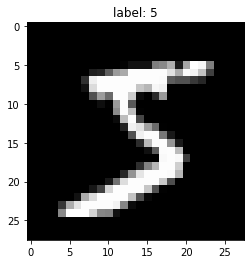

In [4]:
print("mnist_train 길이 : ", len(mnist_train))
print("mnist_test 길이 : ", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0)
print("image data 형태: ", image.size())
print("label: ", label)

# 그리기
img = image.numpy() # image 타입을 numpy로 변환함 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap="gray")
plt.show()

5
<built-in method size of Tensor object at 0x7fb79aaf89b0>
5


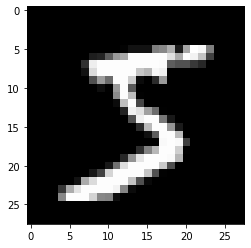

0


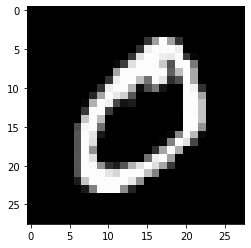

4


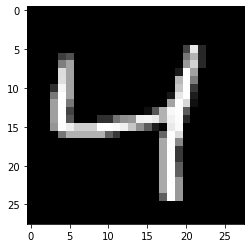

In [5]:
print(mnist_train[0][1]) #label
print(mnist_train[0][0].size) #image

for i in range(3):
  img=mnist_train[i][0].numpy()
  print(mnist_train[i][1])
  plt.imshow(img[0], cmap='gray')
  plt.show()

<built-in method size of Tensor object at 0x7fb7997ec230>
torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


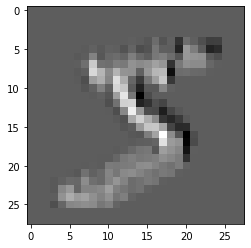

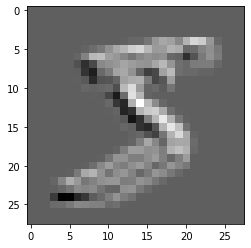

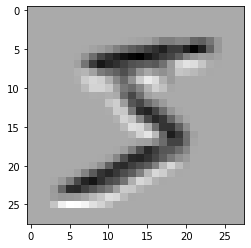

In [6]:
# mnist 의 첫 번째 이미지, 라벨 가져오기
img,label=mnist_train[0]
print(image.size)
# view : tensor의 사이즈 조절. -1: 해당 차원 차원 확장 시켜라
# [1,28,28] -> [1,1,28,28] 여기서 추가된 차원은 batch_size 를 의미함.
image=image.view(-1, image.size()[0], image.size()[1], image.size()[2])

print(image.size())


print(label)

# convolusional filter 정의
conv_layer=nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
# in_c -> 흑백 이미지라 1 channel, out_c -> 3짜리 채널을 만들겠다는 의미.
# default 로 zero padding

# image 에 filter 적용
output = conv_layer(Variable(image)) 
# Variable로 image를 감싸서 넣어줌.CNN, FC 구조에 넣을 때 모두 Variable
print(output.size())

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
  plt.show()

In [7]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate=0.0002
num_epoch = 10 # 1000

In [8]:
# 후에 학습 시킬 때 batch_size 단위로 학습시켜나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [9]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__() # 28 * 28
    self.layer=nn.Sequential(
        nn.Conv2d(1,16,5,padding=2),
        nn.ReLU(),

        nn.Conv2d(16,32,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

        nn.Conv2d(32,64,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc_layer=nn.Sequential(
        nn.Linear(64*7*7,100),
        nn.ReLU(),
        nn.Linear(100,10)
    )

  def forward(self,x):
    out=self.layer(x)
    out=out.view(batch_size, -1)
    out=self.fc_layer(out)
    return out

#model = CNN()  
model = CNN().cuda()     

In [10]:
# 파라미터 체크하기
for parameter in model.parameters():
  print(parameter.shape)
  #print(parameter)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [11]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    #x = Variable(image)
    #y_ = Variable(label)

    x = Variable(image).cuda()
    y_ = Variable(label).cuda()

    optimizer.zero_grad() #optimizer  안에서 이전 gradient들을 초기화함.
    output=model.forward(x)
    loss = loss_func(output, y_)
    loss.backward() # gradient 계산
    optimizer.step() # parameter 업데이트

    if j%50==0:
      print(loss,j,i)

tensor(2.2909, device='cuda:0', grad_fn=<NllLossBackward>) 0 0
tensor(1.6218, device='cuda:0', grad_fn=<NllLossBackward>) 50 0
tensor(0.5839, device='cuda:0', grad_fn=<NllLossBackward>) 0 1
tensor(0.4642, device='cuda:0', grad_fn=<NllLossBackward>) 50 1
tensor(0.2250, device='cuda:0', grad_fn=<NllLossBackward>) 0 2
tensor(0.1805, device='cuda:0', grad_fn=<NllLossBackward>) 50 2
tensor(0.5494, device='cuda:0', grad_fn=<NllLossBackward>) 0 3
tensor(0.1076, device='cuda:0', grad_fn=<NllLossBackward>) 50 3
tensor(0.1571, device='cuda:0', grad_fn=<NllLossBackward>) 0 4
tensor(0.4542, device='cuda:0', grad_fn=<NllLossBackward>) 50 4
tensor(0.1263, device='cuda:0', grad_fn=<NllLossBackward>) 0 5
tensor(0.0610, device='cuda:0', grad_fn=<NllLossBackward>) 50 5
tensor(0.1663, device='cuda:0', grad_fn=<NllLossBackward>) 0 6
tensor(0.0236, device='cuda:0', grad_fn=<NllLossBackward>) 50 6
tensor(0.0406, device='cuda:0', grad_fn=<NllLossBackward>) 0 7
tensor(0.0482, device='cuda:0', grad_fn=<NllLoss

In [13]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [14]:
# 모델 저장하기
torch.save(model,'/content/gdrive/MyDrive/DL_proj_model_save/proj_05.pkl')

In [15]:
try:
  # 미리 학습시킨 네트워크의 파라미터 집합 [피클]이라 발음함.
  model=torch.load('/content/gdrive/MyDrive/DL_proj_model_save/proj_05.pkl')
  print("model restored")
except:
  print('model not restored')

model restored


In [16]:
def ComputeAccr(dloader, imodel):
  correct = 0
  total = 0

  for j, [imgs,labels] in enumerate(dloader):
    #img=Variable(imgs)
    #label=Variable(labels)

    img=Variable(imgs).cuda()
    label=Variable(labels).cuda()

    output = imodel.forward(img)
    _, output_index = torch.max(output,1)

    total += label.size(0)
    correct += (output_index == label).sum().float()
  print("Accuracy of Test Data : {}".format(100*correct/total))

In [17]:
ComputeAccr(test_loader, model)

Accuracy of Test Data : 92.15999603271484
